# **Trabajo Unidad II**

Integrantes:
*   EDUARDO JAQUE





# Respuesta a Preguntas

* Primero importaremos las librerías que usaremos.
* leemos el archivo y para mayor comodidad traduciremos con un diccionario las columnas


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import statsmodels.formula.api as smf
from math import sqrt

#agregamos la ruta del archivo a una variable
ruta = '/content/linelist_raw.xlsx'
df = pd.read_excel(ruta)
# Diccionario con las traducciones de los nombres de las columnas
traducciones = {
    'case_id': 'id_caso',
    'generation': 'generacion',
    'infection date': 'fecha_infeccion',
    'date onset': 'fecha_inicio',
    'hosp date': 'fecha_hospitalizacion',
    'date_of_outcome': 'fecha_resultado',
    'outcome': 'resultado',
    'gender': 'genero',
    'hospital': 'hospital',
    'lon': 'longitud',
    'lat': 'latitud',
    'infector': 'infectador',
    'source': 'fuente',
    'age': 'edad',
    'age_unit': 'unidad_edad',
    'row_num': 'numero_fila',
    'wt_kg': 'peso_kg',
    'ht_cm': 'altura_cm',
    'ct_blood': 'conteo_sangre',
    'fever': 'fiebre',
    'chills': 'escalofrios',
    'cough': 'tos',
    'aches': 'dolores',
    'vomit': 'vomito',
    'temp': 'temperatura',
    'time_admission': 'tiempo_admision',
    'merged_header': 'encabezado_fusionado',
    'Unnamed: 27': 'sin_nombre_27'
}

# Renombrar las columnas del DataFrame
df.rename(columns=traducciones, inplace=True)

1.- Visualiza las primeras 50 líneas del conjunto de datos.

In [2]:
#leemos el archivo
df.head(50)

,id_caso,generacion,fecha_infeccion,fecha_inicio,fecha_hospitalizacion,fecha_resultado,resultado,genero,hospital,longitud,...,conteo_sangre,fiebre,escalofrios,tos,dolores,vomito,temperatura,tiempo_admision,encabezado_fusionado,sin_nombre_27
0,5fe599,4.0,2014-05-08,2014-05-13,2014-05-15,NaT,NaN,m,Other,-13.215735,...,22.0,no,no,yes,no,yes,36.8,NaN,a,b
1,8689b7,4.0,NaT,2014-05-13,2014-05-14,2014-05-18,Recover,f,NaN,-13.215234,...,22.0,NaN,NaN,NaN,NaN,NaN,36.9,09:36,a,b
2,11f8ea,2.0,NaT,2014-05-16,2014-05-18,2014-05-30,Recover,m,St. Mark's Maternity Hospital (SMMH),-13.212911,...,21.0,NaN,NaN,NaN,NaN,NaN,36.9,16:48,a,b
3,b8812a,3.0,2014-05-04,2014-05-18,2014-05-20,NaT,NaN,f,Port Hospital,-13.236371,...,23.0,no,no,no,no,no,36.8,11:22,a,b
4,893f25,3.0,2014-05-18,2014-05-21,2014-05-22,2014-05-29,Recover,m,Military Hospital,-13.222864,...,23.0,no,no,yes,no,yes,36.9,12:60,a,b
5,be99c8,3.0,2014-05-03,2014-05-22,2014-05-23,2014-05-24,Recover,f,Port Hospital,-13.222625,...,21.0,no,no,yes,no,yes,37.6,14:13,a,b
6,07e3e8,4.0,2014-05-22,2014-05-27,2014-05-29,2014-06-01,Recover,f,NaN,-13.233155,...,21.0,NaN,NaN,NaN,NaN,NaN,37.3,14:33,a,b
7,369449,4.0,2014-05-28,2014-06-02,2014-06-03,2014-06-07,Death,f,NaN,-13.232098,...,22.0,no,no,yes,no,yes,37.0,09:25,a,b
8,f393b4,4.0,NaT,2014-06-05,2014-06-06,2014-06-18,Recover,m,NaN,-13.222551,...,22.0,no,no,yes,no,yes,36.4,11:16,a,b
9,1389ca,4.0,NaT,2014-06-05,2014-06-07,2014-06-09,Death,f,NaN,-13.257216,...,22.0,no,no,yes,no,no,35.9,10:55,a,b


2.- Explora los datos para detectar valores faltantes. Detecta la presencia de valores atípicos.

# Con los siguientes códigos vamos a obtener información general de nuestro DataFrame

*  primero vamos a obtener información general de nuestro DataFrame

In [3]:
print("*===============================================================*")
# Detectar valores faltantes
print("Filas y columna:")
print("*===============================================================*")
print("filas|columnas")
df.shape


*===============================================================*
Filas y columna:
*===============================================================*
filas|columnas


(6611, 28)

In [4]:
print("*===============================================================*")
# Detectar valores faltantes
print("Informacion general del DataFrame:")
print("*===============================================================*")
df.info()

*===============================================================*
Informacion general del DataFrame:
*===============================================================*
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6611 entries, 0 to 6610
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id_caso                6604 non-null   object        
 1   generacion             6604 non-null   float64       
 2   fecha_infeccion        4289 non-null   datetime64[ns]
 3   fecha_inicio           6318 non-null   object        
 4   fecha_hospitalizacion  6604 non-null   datetime64[ns]
 5   fecha_resultado        5543 non-null   datetime64[ns]
 6   resultado              5111 non-null   object        
 7   genero                 6287 non-null   object        
 8   hospital               5099 non-null   object        
 9   longitud               6604 non-null   float64       
 10  latitud      

* Visualizamos los valores faltantes por columna

In [5]:
print("*===============================================================*")
# Detectar valores faltantes
faltantes = df.isnull().sum()
print("Valores faltantes por columna:")
print("*===============================================================*")
print(faltantes)

*===============================================================*
Valores faltantes por columna:
*===============================================================*
id_caso                     7
generacion                  7
fecha_infeccion          2322
fecha_inicio              293
fecha_hospitalizacion       7
fecha_resultado          1068
resultado                1500
genero                    324
hospital                 1512
longitud                    7
latitud                     7
infectador               2323
fuente                   2323
edad                      107
unidad_edad                 7
numero_fila                 0
peso_kg                     7
altura_cm                   7
conteo_sangre               7
fiebre                    258
escalofrios               258
tos                       258
dolores                   258
vomito                    258
temperatura               158
tiempo_admision           844
encabezado_fusionado        0
sin_nombre_27              

* Con estos métodos, podemos ver diferente información de nuestro DataFrame, numero de columnas, filas, nombre de columnas y vemos un resumen de los valores faltantes, con esto nos damos cuenta de que existe un índice llamado "numero_fila" el cual debe ser el índice original del DataFrame. Ya que no posee valores nulos o números faltantes.

* A continuación, veremos una representación gráfica de los valores faltantes

*===============================================================*
representación gráfica de los datos faltantes
*===============================================================*


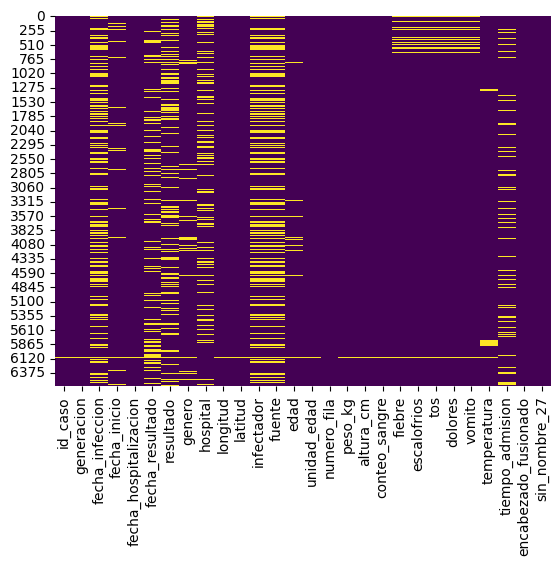

*===============================================================*


In [6]:
print("*===============================================================*")
print("representación gráfica de los datos faltantes")
print("*===============================================================*")
# Visualizar valores faltantes
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()
print("*===============================================================*")


* Vamos a modificar el índice del DataFrame y generar un gráfico Boxplot con los datos numéricos
* por temas de espacio crearemos los Boxplot en un solo grafico

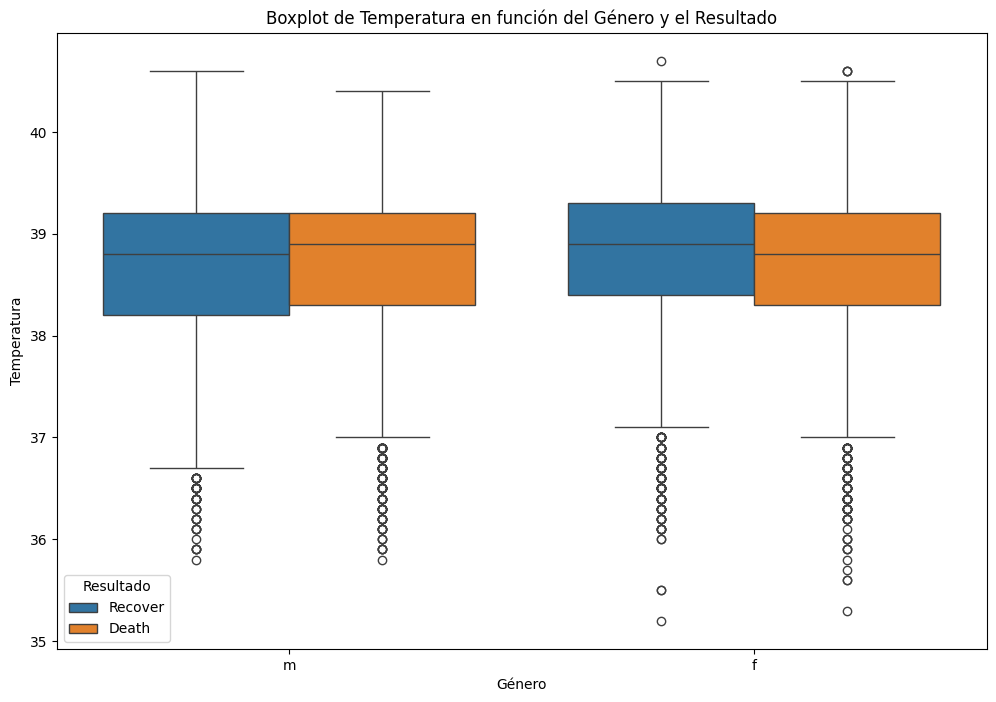

In [7]:
# Crear un nuevo DataFrame con 'numero_fila' como índice
nuevo_df = df.set_index('numero_fila')
# boxplot de la variable temperatura en función del género y el resultado
plt.figure(figsize=(12, 8))
sns.boxplot(x='genero', y='temperatura', hue='resultado', data=df)
plt.title('Boxplot de Temperatura en función del Género y el Resultado')
plt.xlabel('Género')
plt.ylabel('Temperatura')
plt.legend(title='Resultado')
plt.show()

3.- Construye un gráfico de dispersión de los datos.
* considerando que en el punto 4 vamos a realizar una prueba entre peso de los resultados (muertos y recuperados) y el género (femenino y masculino) realizaremos un gráfico de peso contra altura con función de genero


*==============================================================*
Peso vs. Altura
*==============================================================*


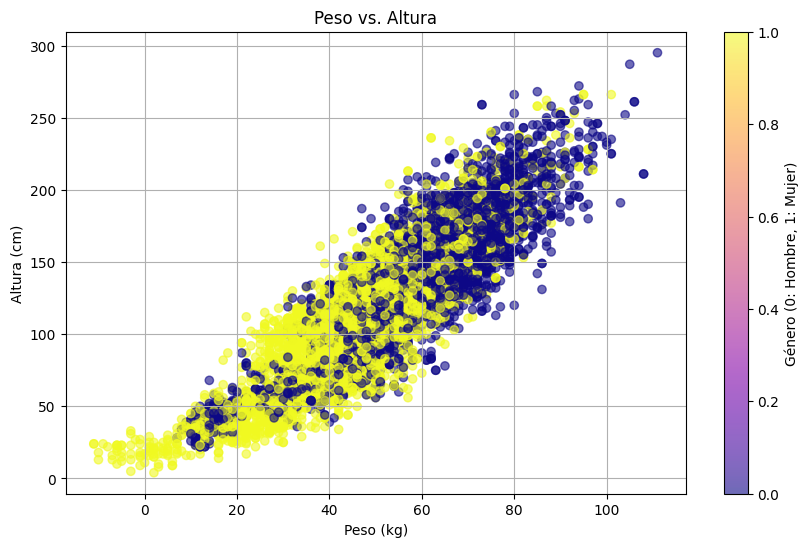

In [8]:
print("*==============================================================*")
print("Peso vs. Altura")
print("*==============================================================*")
# Gráfico 3: Peso vs. Altura
plt.figure(figsize=(10, 6))
plt.scatter(nuevo_df['peso_kg'], nuevo_df['altura_cm'],
            c=nuevo_df['genero']
            .apply(lambda x: 0 if x == 'm' else 1),
            cmap='plasma',
            alpha=0.6)
plt.colorbar(label='Género (0: Hombre, 1: Mujer)')
plt.xlabel('Peso (kg)')
plt.ylabel('Altura (cm)')
plt.title('Peso vs. Altura')
plt.grid(True)
plt.show()

4.- Considera que debes realizar una prueba anova entre las variables outcome y gender. Verifica los supuestos estadísticos necesarios para realizar la prueba sobre los datos que dispones.
- primero y considerando que ya visualizaos algunos datos, vamos a realizar una limpieza para trabajar sobe nuestros datos.
- seleccionaremos las columnas numéricas
* previa investigación, donde se consideró los nombres de todas las columnas y tras una investigación de OSINT. podemos determinar que la base de datos corresponde a una medida de la pandemia del ébola entre el 2012 y el 2015, en Freetown, sierra leona.
* esto nos ayuda a interiorizarnos y saber que analizamos.
* por ende nos ayuda a disminuir o eliminar de una manera evidente, las columnas innecesarias
* a lo cual, tras agrupar las columnas numéricas, eliminamos las columnas de latitud y longitud además del número de fila el cual podemos utilizar como índice o desecharlo
* Continuando con la limpieza de datos, eliminamos los valores NaN correspondientes a resultado

* preparando nuestro DataFrame, agregamos una columna para identificar y realizar un filtro con las palabras claves DEV y TEST. y Utilizamos 2000 datos DEV para realizar nuestra prueba. finalmente agregamos esta columna a nuestro DataFrame arreglado o limpio.
* cabe resaltar que las reglas de negocio fue aplicar 5 kilos de margen

In [9]:
# solo las columnas con valores numéricos, 'resultado' y 'género'
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
selected_columns = numerical_columns + ['resultado', 'genero']
df_resultado_genero = df[selected_columns]

# Eliminar algunas columnas del DataFrame
columns_to_drop = ['longitud','latitud','numero_fila',]
new_df = df_resultado_genero.drop(columns=columns_to_drop)

# Eliminar las filas que posean el valor NaN en la columna 'resultado'
Df_limpio= new_df.dropna(subset=['resultado'])
Df_limpio= new_df.dropna(subset=['genero'])

# Crear una lista con 2000 valores "DEV" y el resto "TEST"
Columna_Nueva = ['DEV'] * 2000 + ['TEST'] * (len(Df_limpio) - 2000)
#==================================================================
# Agregar la nueva columna al DataFrame
Df_limpio['Tipo'] = Columna_Nueva
print("*==============================================================*")
print("primera regresión")
print("*==============================================================*")
primera = smf.ols(formula='peso_kg ~ generacion + edad + altura_cm + \
conteo_sangre + temperatura',
                  data=Df_limpio[(Df_limpio['Tipo'] == "DEV") &
                   (Df_limpio['resultado'] == 'Death')&
                    (Df_limpio['genero'] == 'm')]).fit()


primera.params
primera.pvalues
resumen=primera.summary()
print(resumen)

#evaluacion del modelo
reg_1=Df_limpio.copy()
reg_1['proyeccion']=(primera.params.iloc[0] +
                     reg_1['generacion']*primera.params.iloc[1]+
                     reg_1['edad']*primera.params.iloc[2]+
                     reg_1['altura_cm']*primera.params.iloc[3]+
                     reg_1['conteo_sangre']*primera.params.iloc[4]+
                     reg_1['temperatura']*primera.params.iloc[5])
reg_1['residuos']=reg_1['peso_kg']-reg_1['proyeccion']
reg_1['Varianza']=reg_1['residuos'] ** 2
reg_1['Lim_Inf']=reg_1['peso_kg']- 5
reg_1['Lim_Sup']=reg_1['peso_kg']+ 5
reg_1['Acierto']=np.where((reg_1['proyeccion']>=reg_1['Lim_Inf'])&
 (reg_1['proyeccion']<=reg_1['Lim_Sup']),1,0)
# borre el # si desea ver la reg1
#print(reg_1)

reg=reg_1
comparacion = {
    "Explicabilidad - Desarrollo - R2":     primera.rsquared *100,
    "Explicabilidad - Desarrollo - R2_ajt": primera.rsquared_adj *100,
    "Ajuste - Desarrollo - RMSE":
    sqrt(reg[reg['Tipo']== 'DEV']['Varianza'].mean()),
    "Ajuste - Test - RMSE":
    sqrt(reg[reg['Tipo']== 'TEST']['Varianza'].mean()),
    "Negocio - Desarrollo - Acietos":
    sqrt(reg[reg['Tipo']== 'DEV']['Acierto'].mean()) *100,
    "Negocio - Test - Acietos":
    sqrt(reg[reg['Tipo']== 'TEST']['Acierto'].mean()) *100
}

Comparacion_1= pd.DataFrame(comparacion.items(),
                            columns=['Media','Reg_1'])
print(Comparacion_1)

*==============================================================*
primera regresión
*==============================================================*
                            OLS Regression Results                            
Dep. Variable:                peso_kg   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     329.5
Date:                Thu, 12 Dec 2024   Prob (F-statistic):          2.21e-143
Time:                        13:21:17   Log-Likelihood:                -1498.0
No. Observations:                 429   AIC:                             3008.
Df Residuals:                     423   BIC:                             3032.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|     

<ipython-input-9-e4beb3e5ea7c>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df_limpio['Tipo'] = Columna_Nueva


5.- Determina la correlación entre las variables outcome y gender del conjunto de datos.

* devido a que las variables solicitadas no son numericas, no podemos encontrar una correlacion entre estas variables.

*==============================================================*
grafico de correlacion
*==============================================================*


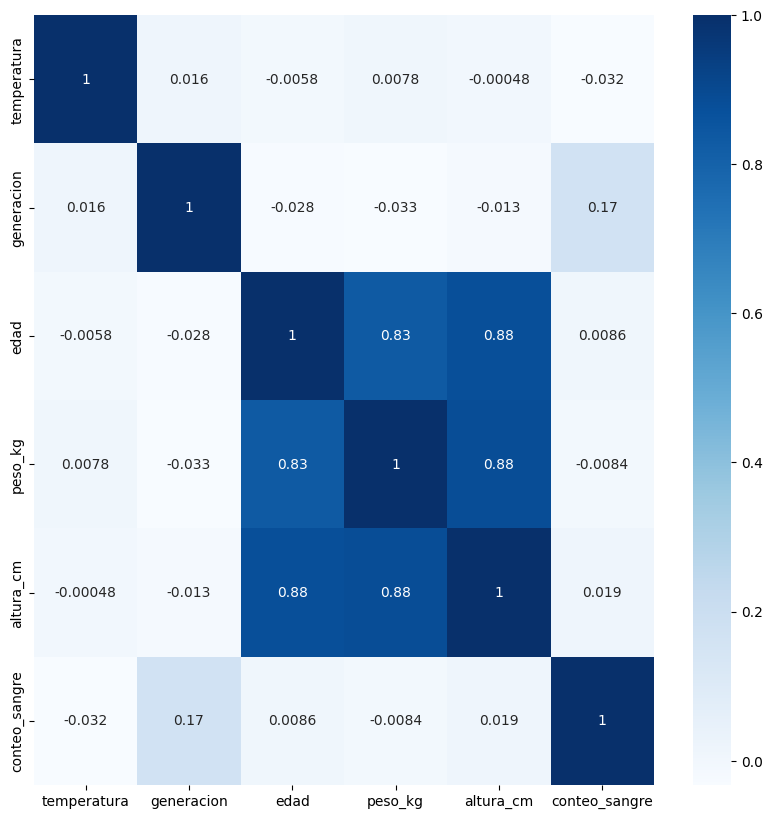

In [10]:
#==================================================================
#correlacion de pirson
print("*==============================================================*")
print("grafico de correlacion")
print("*==============================================================*")
variables= [ 'temperatura','generacion','edad',
            'peso_kg','altura_cm',  'conteo_sangre'   ]
#correlacion con heatmap
ax= plt.figure(figsize=(10,10))
sns.heatmap(
    data=Df_limpio[variables].corr(),
    cbar=True,
    annot=True,
    cmap="Blues",
    yticklabels=variables,
    xticklabels=variables)
plt.savefig("Correlation_matrix.png")
plt.show()

6.- Construye un modelo de regresión lineal de sus datos.

In [11]:
#==================================================================
#segunda regresion
print("*==============================================================*")
print("segunda regresión ")
print("*==============================================================*")
segunda= smf.ols(formula='peso_kg ~ generacion  + altura_cm + \
conteo_sangre + temperatura',
                 data=Df_limpio[(Df_limpio['Tipo'] == "DEV") &
                  (Df_limpio['resultado'] == 'Death') &
                  (Df_limpio['genero'] == 'm')]).fit()

segunda.params
segunda.pvalues
resumen=segunda.summary()
print(resumen)

#evaluacion del modelo
reg_2=Df_limpio.copy()
reg_2['proyeccion']=(segunda.params.iloc[0] +
                     reg_2['generacion']*segunda.params.iloc[1]+
                     reg_2['altura_cm']*segunda.params.iloc[2]+
                     reg_2['conteo_sangre']*segunda.params.iloc[3]+
                     reg_2['temperatura']*segunda.params.iloc[4])
reg_2['residuos']=reg_2['peso_kg']-reg_2['proyeccion']
reg_2['Varianza']=reg_2['residuos'] ** 2
reg_2['Lim_Inf']=reg_2['peso_kg']- 5
reg_2['Lim_Sup']=reg_2['peso_kg']+ 5
reg_2['Acierto']=np.where((reg_2['proyeccion']>=reg_2['Lim_Inf'])&
 (reg_2['proyeccion']<=reg_2['Lim_Sup']),1,0)

reg=reg_2
comparacion2 = {
    "Explicabilidad - Desarrollo - R2":     segunda.rsquared *100,
    "Explicabilidad - Desarrollo - R2_ajt": segunda.rsquared_adj *100,
    "Ajuste - Desarrollo - RMSE":
    sqrt(reg[reg['Tipo']== 'DEV']['Varianza'].mean()),
    "Ajuste - Test - RMSE":
    sqrt(reg[reg['Tipo']== 'TEST']['Varianza'].mean()),
    "Negocio - Desarrollo - Acietos":
    sqrt(reg[reg['Tipo']== 'DEV']['Acierto'].mean()) *100,
    "Negocio - Test - Acietos":
    sqrt(reg[reg['Tipo']== 'TEST']['Acierto'].mean()) *100
}

Comparacion_2= pd.DataFrame(comparacion2.items(),
                            columns=['Media','reg_2'])
print(Comparacion_2)

#===========================================================
#tercera regresión
print("*==============================================================*")
print("tercera regresión ")
print("*==============================================================*")
tercera=smf.ols(formula='peso_kg ~ generacion  + altura_cm ',
                  data=Df_limpio[(Df_limpio['Tipo'] == "DEV") &
                   (Df_limpio['resultado'] == 'Death')&
                    (Df_limpio['genero'] == 'm')]).fit()

tercera.params
tercera.pvalues
resumen=tercera.summary()
print(resumen)

#evaluacion del modelo
reg_3=Df_limpio.copy()
reg_3['proyeccion']=(segunda.params.iloc[0] +
                     reg_3['generacion']*segunda.params.iloc[1]+
                     reg_3['altura_cm']*segunda.params.iloc[2])
reg_3['residuos']=reg_3['peso_kg']-reg_3['proyeccion']
reg_3['Varianza']=reg_3['residuos'] ** 2
reg_3['Lim_Inf']=reg_3['peso_kg']- 5
reg_3['Lim_Sup']=reg_3['peso_kg']+ 5
reg_3['Acierto']=np.where((reg_3['proyeccion']>=reg_3['Lim_Inf'])&
 (reg_3['proyeccion']<=reg_3['Lim_Sup']),1,0)


reg=reg_3
comparacion3 = {
    "Explicabilidad - Desarrollo - R2":     tercera.rsquared *100,
    "Explicabilidad - Desarrollo - R2_ajt": tercera.rsquared_adj *100,
    "Ajuste - Desarrollo - RMSE":
    sqrt(reg[reg['Tipo']== 'DEV']['Varianza'].mean()),
    "Ajuste - Test - RMSE":
    sqrt(reg[reg['Tipo']== 'TEST']['Varianza'].mean()),
    "Negocio - Desarrollo - Acietos":
    sqrt(reg[reg['Tipo']== 'DEV']['Acierto'].mean()) *100,
    "Negocio - Test - Acietos":
    sqrt(reg[reg['Tipo']== 'TEST']['Acierto'].mean()) *100
}

Comparacion_3= pd.DataFrame(comparacion3.items(),
                            columns=['Media','reg_3'])
print(Comparacion_3)

*==============================================================*
segunda regresión 
*==============================================================*
                            OLS Regression Results                            
Dep. Variable:                peso_kg   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     376.5
Date:                Thu, 12 Dec 2024   Prob (F-statistic):          4.94e-138
Time:                        13:21:36   Log-Likelihood:                -1513.6
No. Observations:                 429   AIC:                             3037.
Df Residuals:                     424   BIC:                             3057.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|    

* resumen de las tres correlaciones

In [12]:
data_frames= [Comparacion_1,Comparacion_2,Comparacion_3]
from functools import reduce

# Fusionar los dataframes en la columna 'Medida' usando una unión externa
df_merged = reduce(lambda left, right: pd.merge(left, right, on=['Media'], how='outer'), data_frames)

# Formatear las columnas 'reg_1', 'reg_2' y 'reg_3' a un decimal
df_merged = df_merged.style.format({'reg_1': "{:.1f}", 'reg_2': "{:.1f}", 'reg_3': "{:.1f}"})

# Mostrar el dataframe fusionado con las columnas formateadas
df_merged



,Media,Reg_1,reg_2,reg_3
0,Ajuste - Desarrollo - RMSE,8.535711,8.7,9.5
1,Ajuste - Test - RMSE,8.595130,8.8,9.4
2,Explicabilidad - Desarrollo - R2,79.569241,78.0,78.2
3,Explicabilidad - Desarrollo - R2_ajt,79.327743,77.8,78.1
4,Negocio - Desarrollo - Acietos,66.745786,65.0,62.8
5,Negocio - Test - Acietos,65.388969,64.5,63.8
